# Image Anonymization With Microsoft Presidio
- **Image Redactor - Presidio**
  - https://microsoft.github.io/presidio/image-redactor/

- **Presedio smaple code refer:** - https://microsoft.github.io/presidio/samples/

### Install tessaract in VM
- https://github.com/tesseract-ocr/tesseract#installing-tesseract


#### This !sudo apt install tesseract-ocr to install in colab directly

In [3]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,945 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [1]:
!pip install presidio-image-redactor -q
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.4/301.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 894.9 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload depen

## Getting started (standard image types)

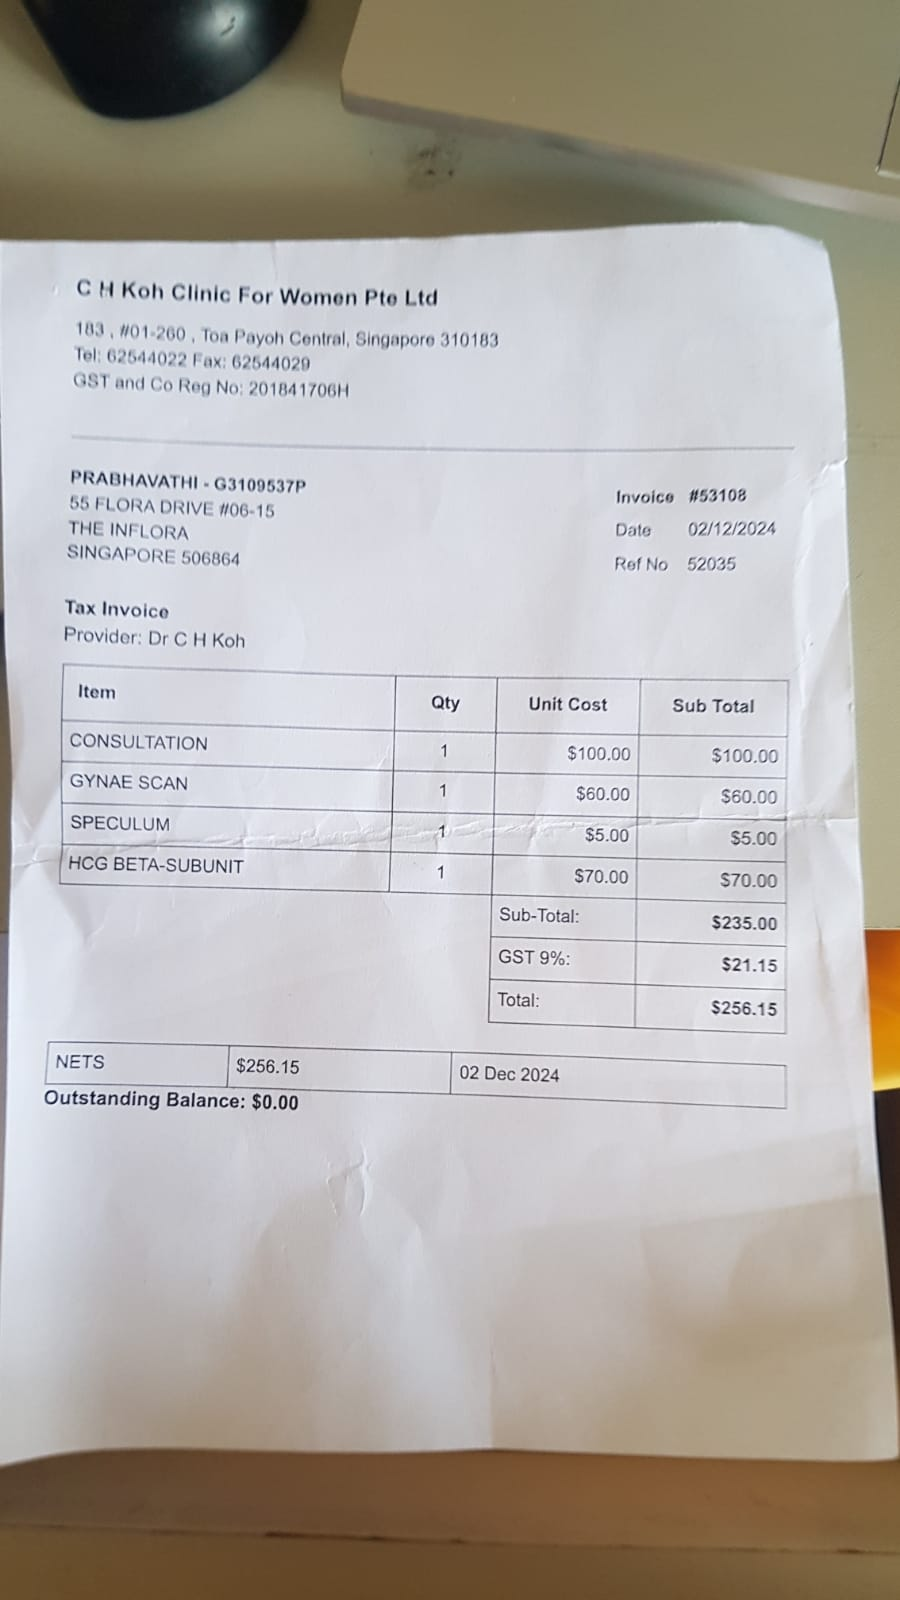

In [11]:
from PIL import Image
from presidio_image_redactor import ImageRedactorEngine

# Get the image to redact using PIL lib (pillow)
# image = Image.open("./docs/image-redactor/ocr_text.png")
image = Image.open("/content/sample_data/Invoice_1.jpeg")
image

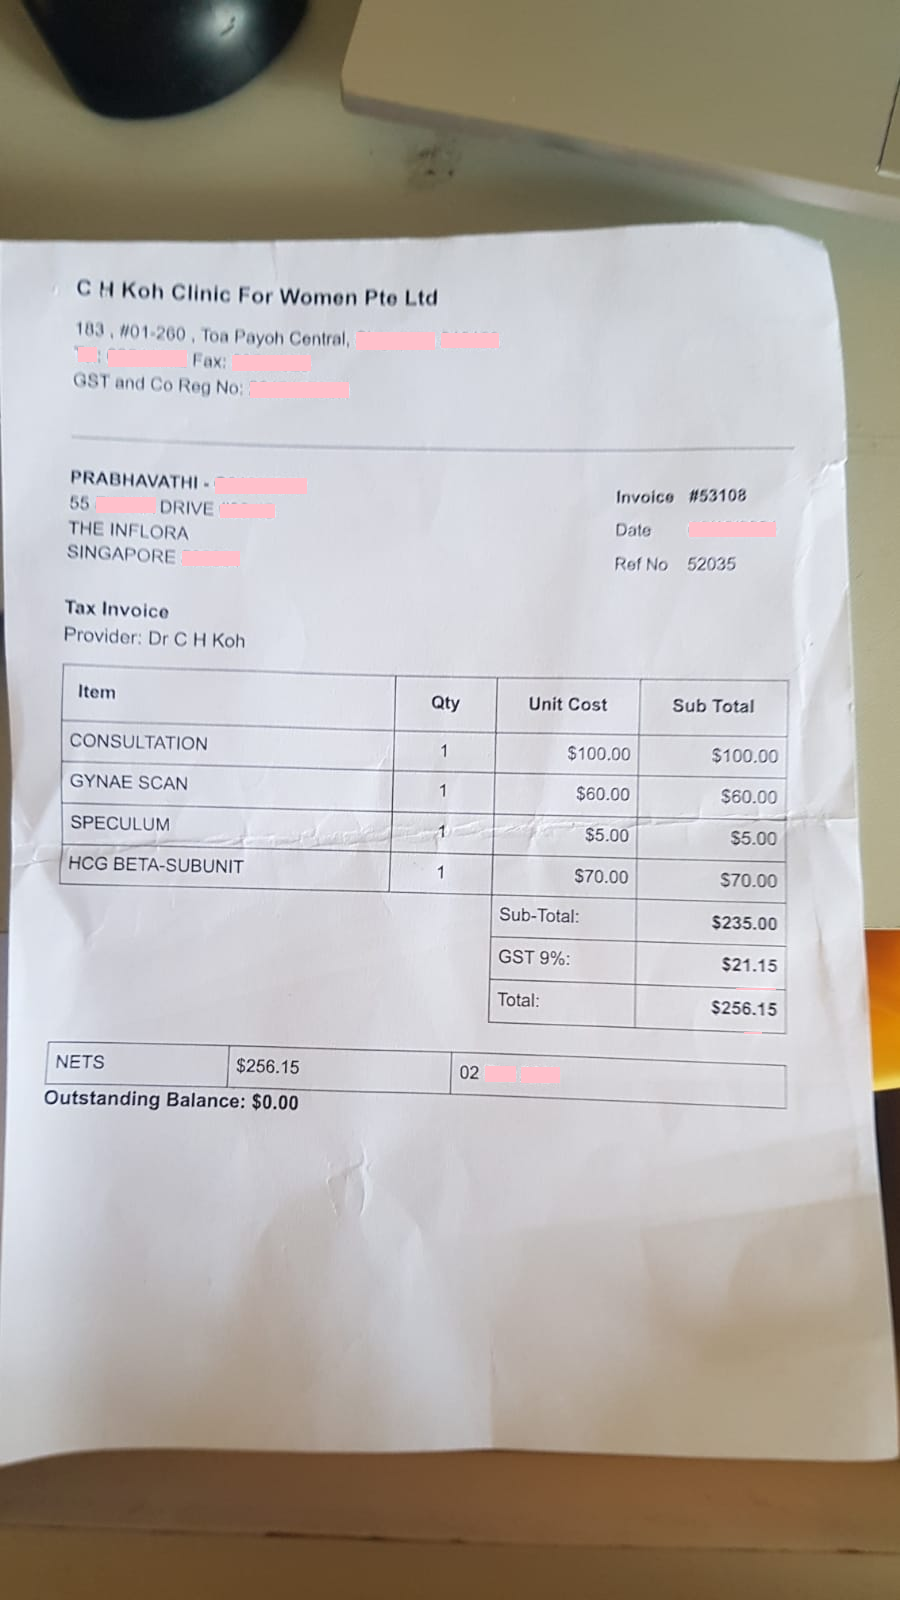

In [14]:
# Initialize the engine
engine = ImageRedactorEngine()

# Redact the image with pink color
redacted_image = engine.redact(image, (255, 192, 203))

# save the redacted image
redacted_image.save("new_image.png")
# uncomment to open the image for viewing

# redacted_image.show()
redacted_image

### Adding allow_list
- Refer: https://microsoft.github.io/presidio/samples/python/image_redaction_allow_list_approach/

- The allow_list argument can be used in both standard and DICOM iamge redaction to allow specified words to avoid redaction. This can also be used to redact all detected text.

- While this approach allows for the greatest recall in terms of redacting sensitive text, it is dependent on the performance of the text detection which comes before analysis.

####1. Scenario :Adding allow_list
- allow_list argument to prevent certain words from being redacted from images and explains how you can use this to implement a strict redact all text approach.
- Whether using the default recognizer, registering your own custom recognizer, or using ad-hoc recognizers to identify sensitive entities, there may be times where you do not want certain words redacted. That time use allow_list

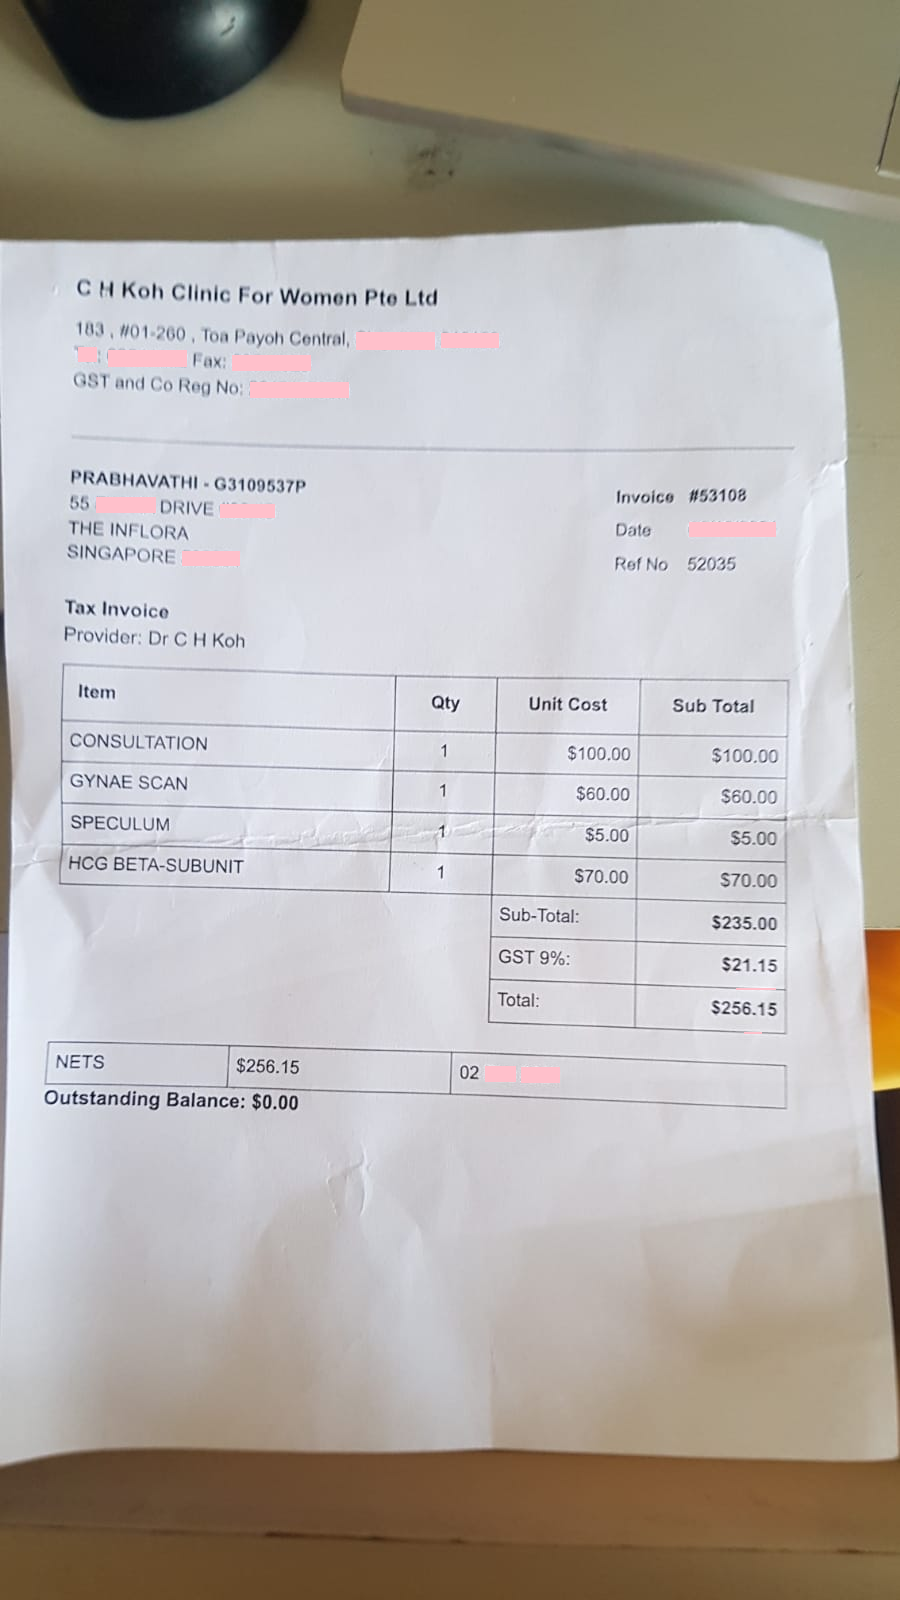

In [16]:
redacted_image = engine.redact(image, (255, 192, 203), allow_list=["G3109537P", "62544029"])
#  here allow fax number and NRIC No
display(redacted_image)


####2. Scenario : Only allow specific words while redacting all other text¶
In some cases, we want to preserve certain words and redact all other text in the image. We can create an ad-hoc recognizer that considers all text as sensitive and couple that with the allow list.

Note: The allow_list argument should be positioned as the last argument in the redact call as it is considered a text analyzer kwarg.

In [18]:
from presidio_analyzer import Pattern, PatternRecognizer
pattern_all_text = Pattern(name="any_text", regex=r"(?s).*", score=0.5)
custom_recognizer = PatternRecognizer(
    supported_entity="TEXT",
    patterns=[pattern_all_text],
)

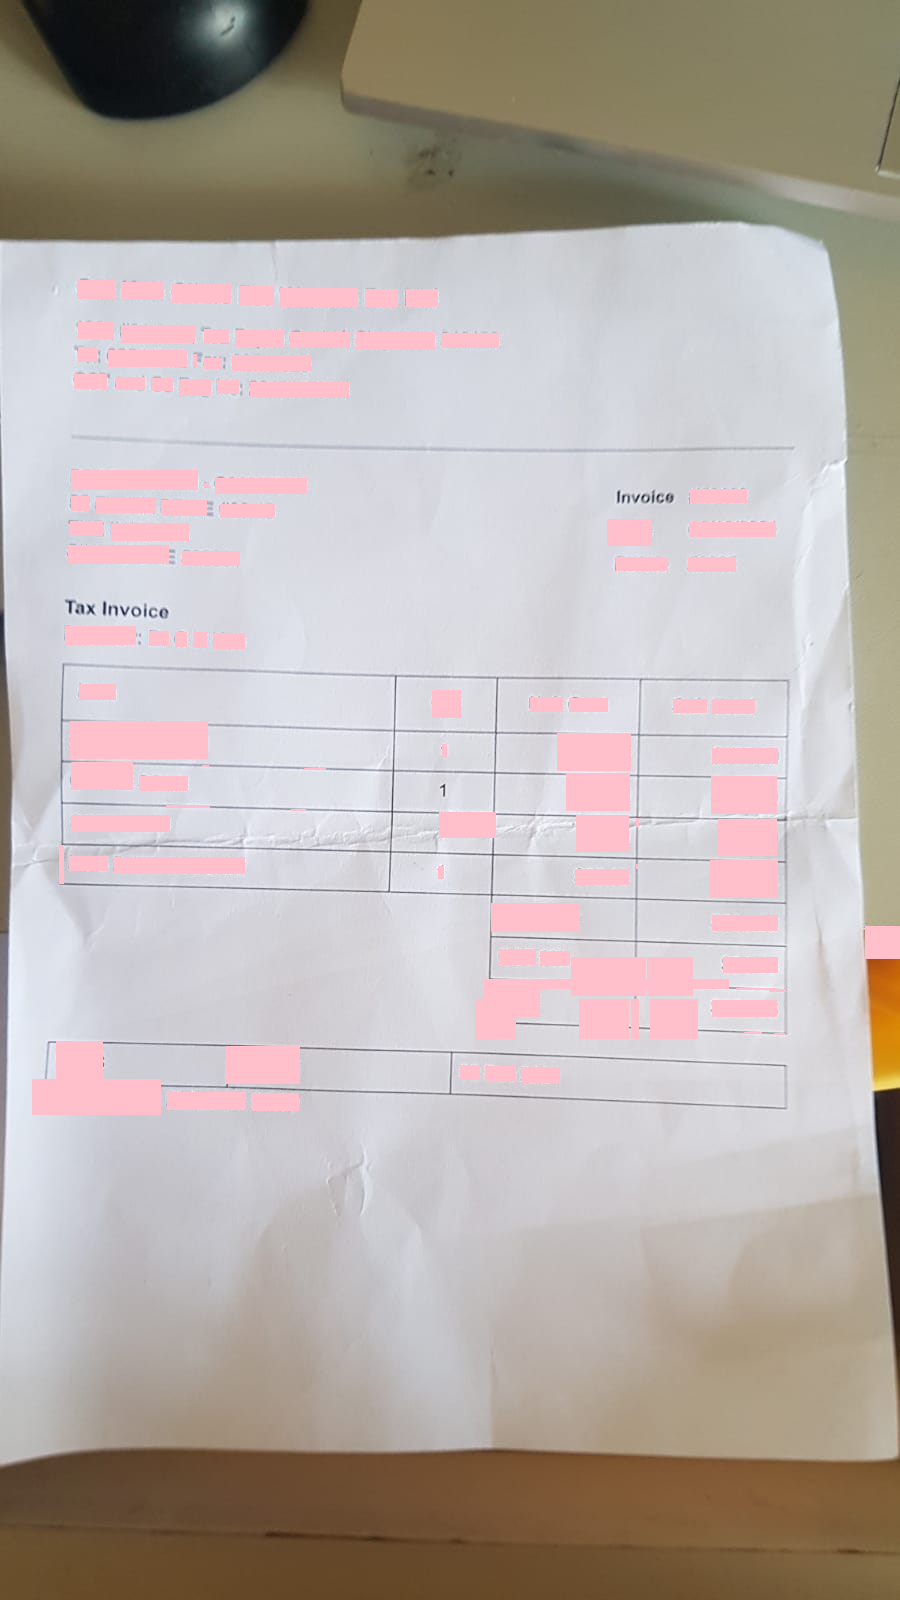

In [21]:
# Standard image
redacted_image = engine.redact(
    image,
    (255, 192, 203),
    ad_hoc_recognizers = [custom_recognizer], # you can pass in multiple ad-hoc recognizers
    allow_list=["Tax", "Invoice",]
)
display(redacted_image)

####3. Scenario: Redact all text on the image
- When it is critical to minimize False Negatives during the redaction process, we recommend using a "redact all" approach to redact all detected text.

As with the other scenarios, good OCR performance is critical in ensuring the analyzer can pick up on all text in the image. False Negatives may still occur with images if the OCR fails to pick up on all the text.

In [22]:
pattern_all_text = Pattern(name="any_text", regex=r"(?s).*", score=0.5)
custom_recognizer = PatternRecognizer(
    supported_entity="TEXT",
    patterns=[pattern_all_text],
)

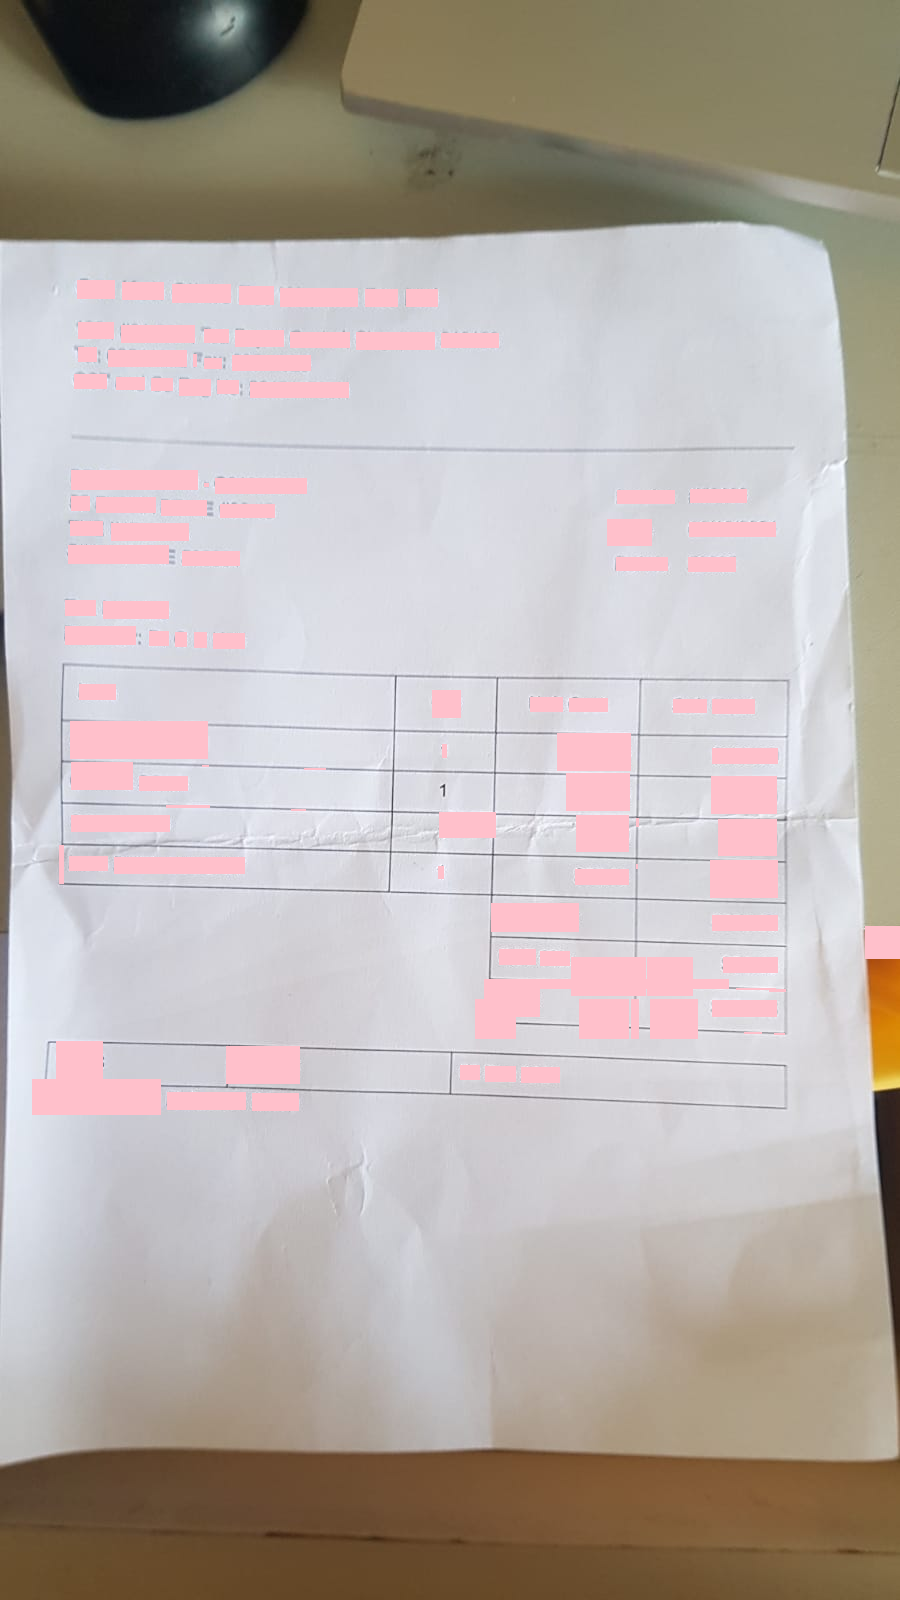

In [23]:
#Specify an empty allow list such that no text is allowed
# Standard image
redacted_image = engine.redact(
    image,
    (255, 192, 203),
    ad_hoc_recognizers = [custom_recognizer],
    allow_list=[]
)
display(redacted_image)

## Getting started (DICOM images)
- This approach used if doc in **.dcm** format only
- A DCM file is an image file saved in the Digital Imaging and Communications in Medicine (DICOM) image format. It stores a medical image, such as a CT scan or ultrasound, and may also include patient information to pair the image with the patient.

In [8]:
# import pydicom
# from presidio_image_redactor import DicomImageRedactorEngine

# # Set input and output paths
# input_path = "path/to/your/dicom/file.dcm"
# output_dir = "./output"

# # Initialize the engine
# engine = DicomImageRedactorEngine()

# # Option 1: Redact from a loaded DICOM image
# dicom_image = pydicom.dcmread(input_path)
# redacted_dicom_image = engine.redact(dicom_image, fill="contrast")


# # Option 2: Redact from a loaded DICOM image and return redacted regions
# redacted_dicom_image, bboxes = engine.redact_and_return_bbox(dicom_image, fill="contrast")

# # Option 3: Redact from DICOM file and save redacted regions as json file
# engine.redact_from_file(input_path, output_dir, padding_width=25, fill="contrast", save_bboxes=True)

# # Option 4: Redact from directory and save redacted regions as json files
# ocr_kwargs = {"ocr_threshold": 50}
# # engine.redact_from_directory("path/to/your/dicom", output_dir, fill="background", save_bboxes=True, ocr_kwargs=ocr_kwargs)
# engine.redact_from_directory("/content/dicom", output_dir, fill="background", save_bboxes=True, ocr_kwargs=ocr_kwargs)

## Getting started using the document intelligence OCR engine
- Presidio offers two engines for OCR based PII removal. The first is the default engine which uses Tesseract OCR. The second is the Document Intelligence OCR engine which uses Azure's Document Intelligence service, which requires an Azure subscription. The following sections describe how to setup and use the Document Intelligence OCR engine.
- Refer: https://microsoft.github.io/presidio/image-redactor/

# PDF Annotating  With Microsoft Presidio(Here not Anonymization ):
- https://microsoft.github.io/presidio/samples/python/example_pdf_annotation/

In [24]:
!pip install presidio_analyzer presidio_anonymizer -q
!python -m spacy download en_core_web_lg -q
!pip install pdfminer.six pikepdf -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 819.7 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 60.8 MB/s eta 0:00:00


In [1]:
# For Presidio
from presidio_analyzer import AnalyzerEngine, PatternRecognizer
from presidio_anonymizer import AnonymizerEngine
from presidio_anonymizer.entities import OperatorConfig

# For console output
from pprint import pprint

# For extracting text
from pdfminer.high_level import extract_text, extract_pages
from pdfminer.layout import LTTextContainer, LTChar, LTTextLine

# For updating the PDF
from pikepdf import Pdf, AttachedFileSpec, Name, Dictionary, Array

## Analyze the text in the PDF¶
- To extract the text from the PDF, we use the pdf miner library. We extract the text from the PDF at the text container level. This is roughly equivalent to a paragraph.

- We then use Presidio Analyzer to identify the PII and it's location in the text.

- The Presidio analyzer is using pre-defined entity recognizers, and offers the option to create custom recognizers.

In [2]:
analyzer = AnalyzerEngine()

analyzed_character_sets = []

for page_layout in extract_pages("./sample_data/Invoice_pdf.pdf"):
    for text_container in page_layout:
        if isinstance(text_container, LTTextContainer):

            # The element is a LTTextContainer, containing a paragraph of text.
            text_to_anonymize = text_container.get_text()

            # Analyze the text using the analyzer engine
            analyzer_results = analyzer.analyze(text=text_to_anonymize, language='en')

            if text_to_anonymize.isspace() == False:
                print(text_to_anonymize)
                print(analyzer_results)

            characters = list([])

            # Grab the characters from the PDF
            for text_line in filter(lambda t: isinstance(t, LTTextLine), text_container):
                    for character in filter(lambda t: isinstance(t, LTChar), text_line):
                            characters.append(character)


            # Slice out the characters that match the analyzer results.
            for result in analyzer_results:
                start = result.start
                end = result.end
                analyzed_character_sets.append({"characters": characters[start:end], "result": result})

This is sample PDF holds image as well.

[]
Patient name : Prabhavathi G3109537Q
AGE 236

[type: SG_NRIC_FIN, start: 27, end: 36, score: 0.5]


## Create phrase bounding boxes
- The next task is to take the character data, and inflate it into full phrase bounding boxes.

- For example, for an email address, we'll turn the bounding boxes for each character in the email address into one single bounding box.

In [4]:
# Combine the bounding boxes into a single bounding box.
def combine_rect(rectA, rectB):
    a, b = rectA, rectB
    startX = min( a[0], b[0] )
    startY = min( a[1], b[1] )
    endX = max( a[2], b[2] )
    endY = max( a[3], b[3] )
    return (startX, startY, endX, endY)

analyzed_bounding_boxes = []

# For each character set, combine the bounding boxes into a single bounding box.
for analyzed_character_set in analyzed_character_sets:
    completeBoundingBox = analyzed_character_set["characters"][0].bbox

    for character in analyzed_character_set["characters"]:
        completeBoundingBox = combine_rect(completeBoundingBox, character.bbox)

    analyzed_bounding_boxes.append({"boundingBox": completeBoundingBox, "result": analyzed_character_set["result"]})

analyzed_bounding_boxes

[{'boundingBox': (90.0, 720.6655999999999, 251.2443, 742.8556),
  'result': type: SG_NRIC_FIN, start: 27, end: 36, score: 0.5}]

## Add highlight annotations
- We finally iterate through all the analyzed bounding boxes and create highlight annotations for all of them.

In [5]:
pdf = Pdf.open("./sample_data/Invoice_pdf.pdf")

annotations = []

# Create a highlight annotation for each bounding box.
for analyzed_bounding_box in analyzed_bounding_boxes:

    boundingBox = analyzed_bounding_box["boundingBox"]

    # Create the annotation.
    # We could also create a redaction annotation if the ongoing workflows supports them.
    highlight = Dictionary(
        Type=Name.Annot,
        Subtype=Name.Highlight,
        QuadPoints=[boundingBox[0], boundingBox[3],
                    boundingBox[2], boundingBox[3],
                    boundingBox[0], boundingBox[1],
                    boundingBox[2], boundingBox[1]],
        Rect=[boundingBox[0], boundingBox[1], boundingBox[2], boundingBox[3]],
        C=[1, 0, 0],
        CA=0.5,
        T=analyzed_bounding_box["result"].entity_type,
    )

    annotations.append(highlight)

# Add the annotations to the PDF.
pdf.pages[0].Annots = pdf.make_indirect(annotations)

# And save.
pdf.save("./sample_data/sample_annotated.pdf")

show(pdf)

<pikepdf.Pdf description='./sample_data/Invoice_pdf.pdf'>

In [11]:
! pip install pdfreader -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 10.6 MB/s eta 0:00:00


In [13]:
# from pdfreader import SimplePDFViewer, PageDoesNotExist

# fd = open("./sample_data/sample_annotated.pdf", "rb")
# viewer = SimplePDFViewer(fd)

# try:
#   while True:
#     viewer.render()
#     print(viewer.canvas.text_content)
#     viewer.next()
# except PageDoesNotExist:
#   pass

## Conclusion:
  - In this PII Iin PDF text identified and its highlighted in different color as bounding box
  - But it didnt anonymize it
  - It didnt detect PII which is added in pdf 2nd page, only text it identified
